## EDA

This notebook follows a standard EDA workflow in order to visualise the raw data and to aid decision making on the next steps

In [1]:
#import required packages 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in the train and test datasets

train_raw=pd.read_csv('data/train_raw.csv',delimiter=',')
test_raw=pd.read_csv('data/test_raw.csv',delimiter=',')

In [5]:
# initial look at the dataframe 

train_raw.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
# print df shape

print("Training Dataset shape is: ",train_raw.shape)
print("Testing Dataset shape is: ",test_raw.shape)

Training Dataset shape is:  (8693, 14)
Testing Dataset shape is:  (4277, 13)


In [6]:
# output df info

train_raw.info()  #some missing values, some features not the correct data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
# look for duplicates 

print(f"Duplicates in Train Dataset is:{train_raw.duplicated().sum()},({100*train_raw.duplicated().sum()/len(train_raw)})%")
print(f"Duplicates in Test Dataset is:{test_raw.duplicated().sum()},({100*test_raw.duplicated().sum()/len(test_raw)})%")

Duplicates in Train Dataset is:0,(0.0)%
Duplicates in Test Dataset is:0,(0.0)%


In [9]:
#check the percentage of missing values in the training dataframe 

train_missing = (train_raw.isnull().sum()[train_raw.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing values"})
train_missing["% of Missing Values"] = round((100*train_raw.isnull().sum()[train_raw.isnull().sum()>0]/len(train_raw)),2)
train_missing

,Number of Missing values,% of Missing Values
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


In [10]:
#check the percentage of missing values in the test dataframe 

test_missing = (test_raw.isnull().sum()[test_raw.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing values"})
test_missing["% of Missing Values"] = round((100*test_raw.isnull().sum()[test_raw.isnull().sum()>0]/len(test_raw)),2)
test_missing

,Number of Missing values,% of Missing Values
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29
Spa,101,2.36


In [ ]:
# find the cardinality of features in train and test set (number of unique entries )

print("cardinality of categorical features in training datasets is:")
print(train_raw.select_dtypes(include="object").nunique())
print("\n","-"*70)
print("\nCardinality of categorical features in testing datsets is:")
print(test_raw.select_dtypes(include="object").nunique())

#we can see that passenger ID, cabin and name have a high cardinality- we could choose to remove these features but can also use feature engineering to manipulate them 

cardinality of categorical features in training datasets is:
PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

 ----------------------------------------------------------------------

Cardinality of categorical features in testing datsets is:
PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64


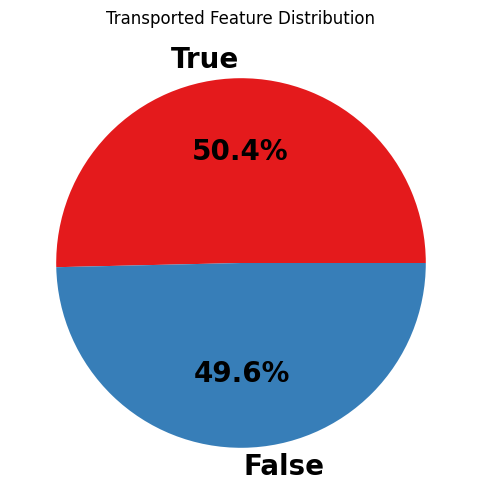

In [ ]:
# visualise target variable using pie chart 

plt.figure(figsize=(10,6))
plt.pie(train_raw["Transported"].value_counts(),labels=train_raw["Transported"].value_counts().keys(),autopct="%1.1f%%",
       textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set1"))
plt.title("Transported Feature Distribution");

#very balanced between predictions in target variable, therefore over/ under sampling techniques are not required 

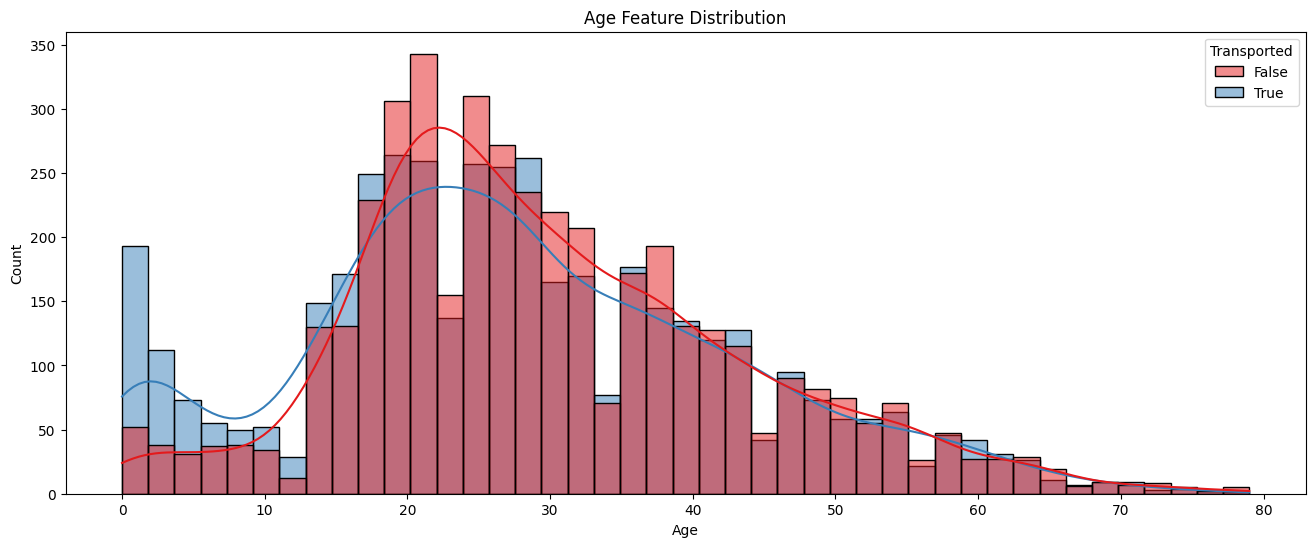

In [25]:
#visualising age feature

plt.figure(figsize=(16,6))
sns.histplot(x=train_raw["Age"],hue="Transported",data=train_raw,kde=True,palette="Set1") #KDE depicts the probability density function of the continuous or non-parametric data variables 
plt.title("Age Feature Distribution");

#Ages 0-18, more likely to be transported 
#18-40 more likely to not be transported
#sinilar likelihood from age 4 plus 
#most passengers are aged between 18-32 

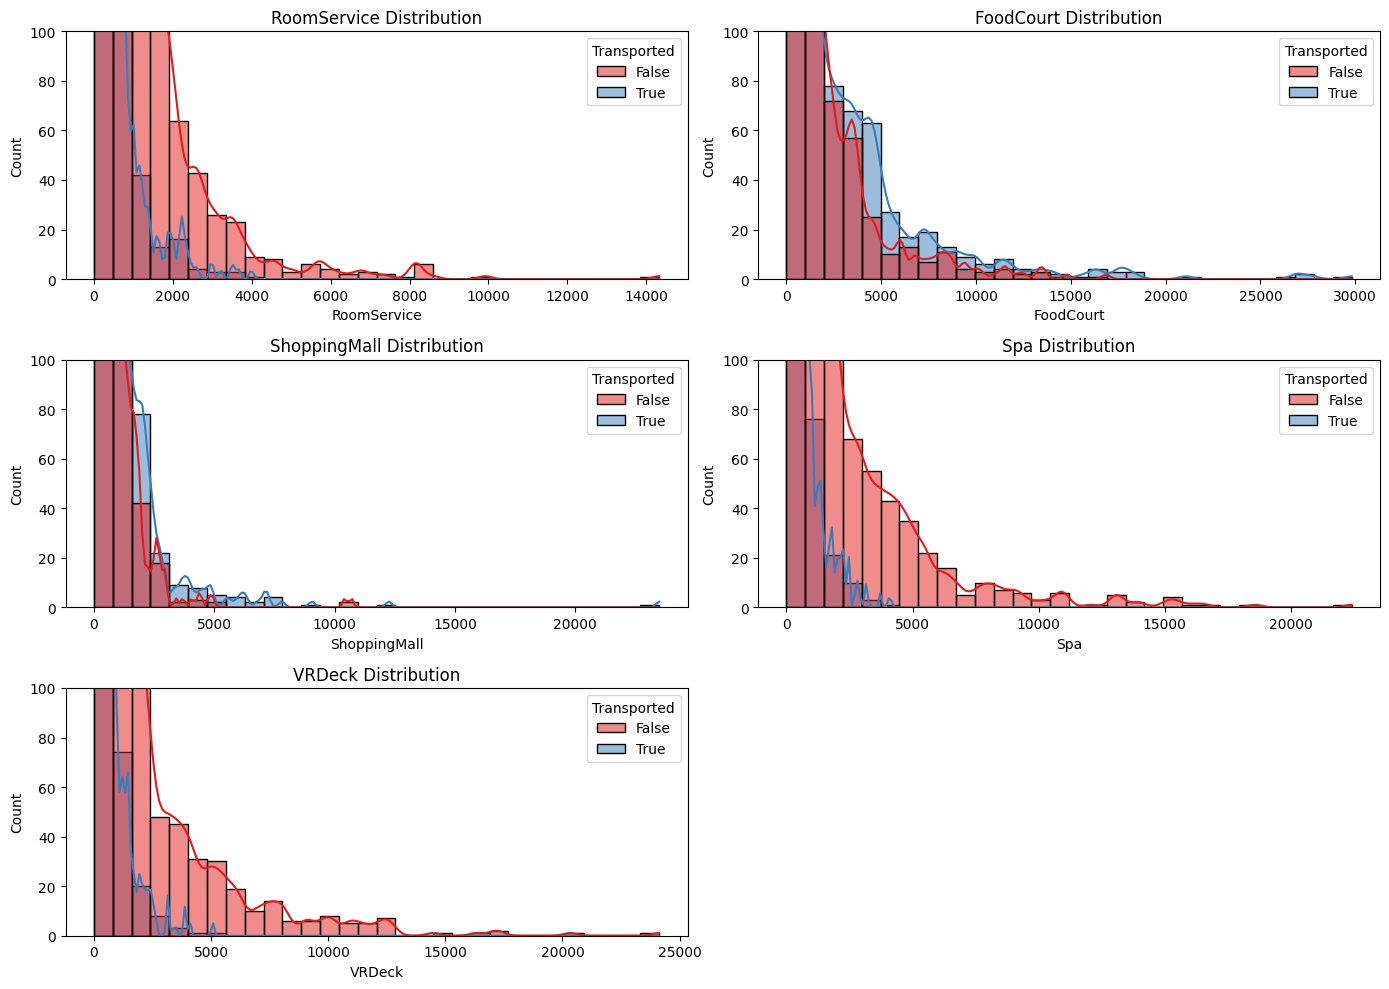

In [26]:
#visualising expenditure features 

exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

plt.figure(figsize=(14,10))
for idx,column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="Transported", data=train_raw,bins=30,kde=True,palette="Set1")
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.tight_layout()

#passengers who used room service, spa and vr deck more are less likely to be transported 
#shopping mall and food court distribution does not seem to correlate with likelihood of transportation 
#most passengers expenditure is zero
#all expenditure distributions are highly right-skewed, therefore would be wise to normalise this feature 

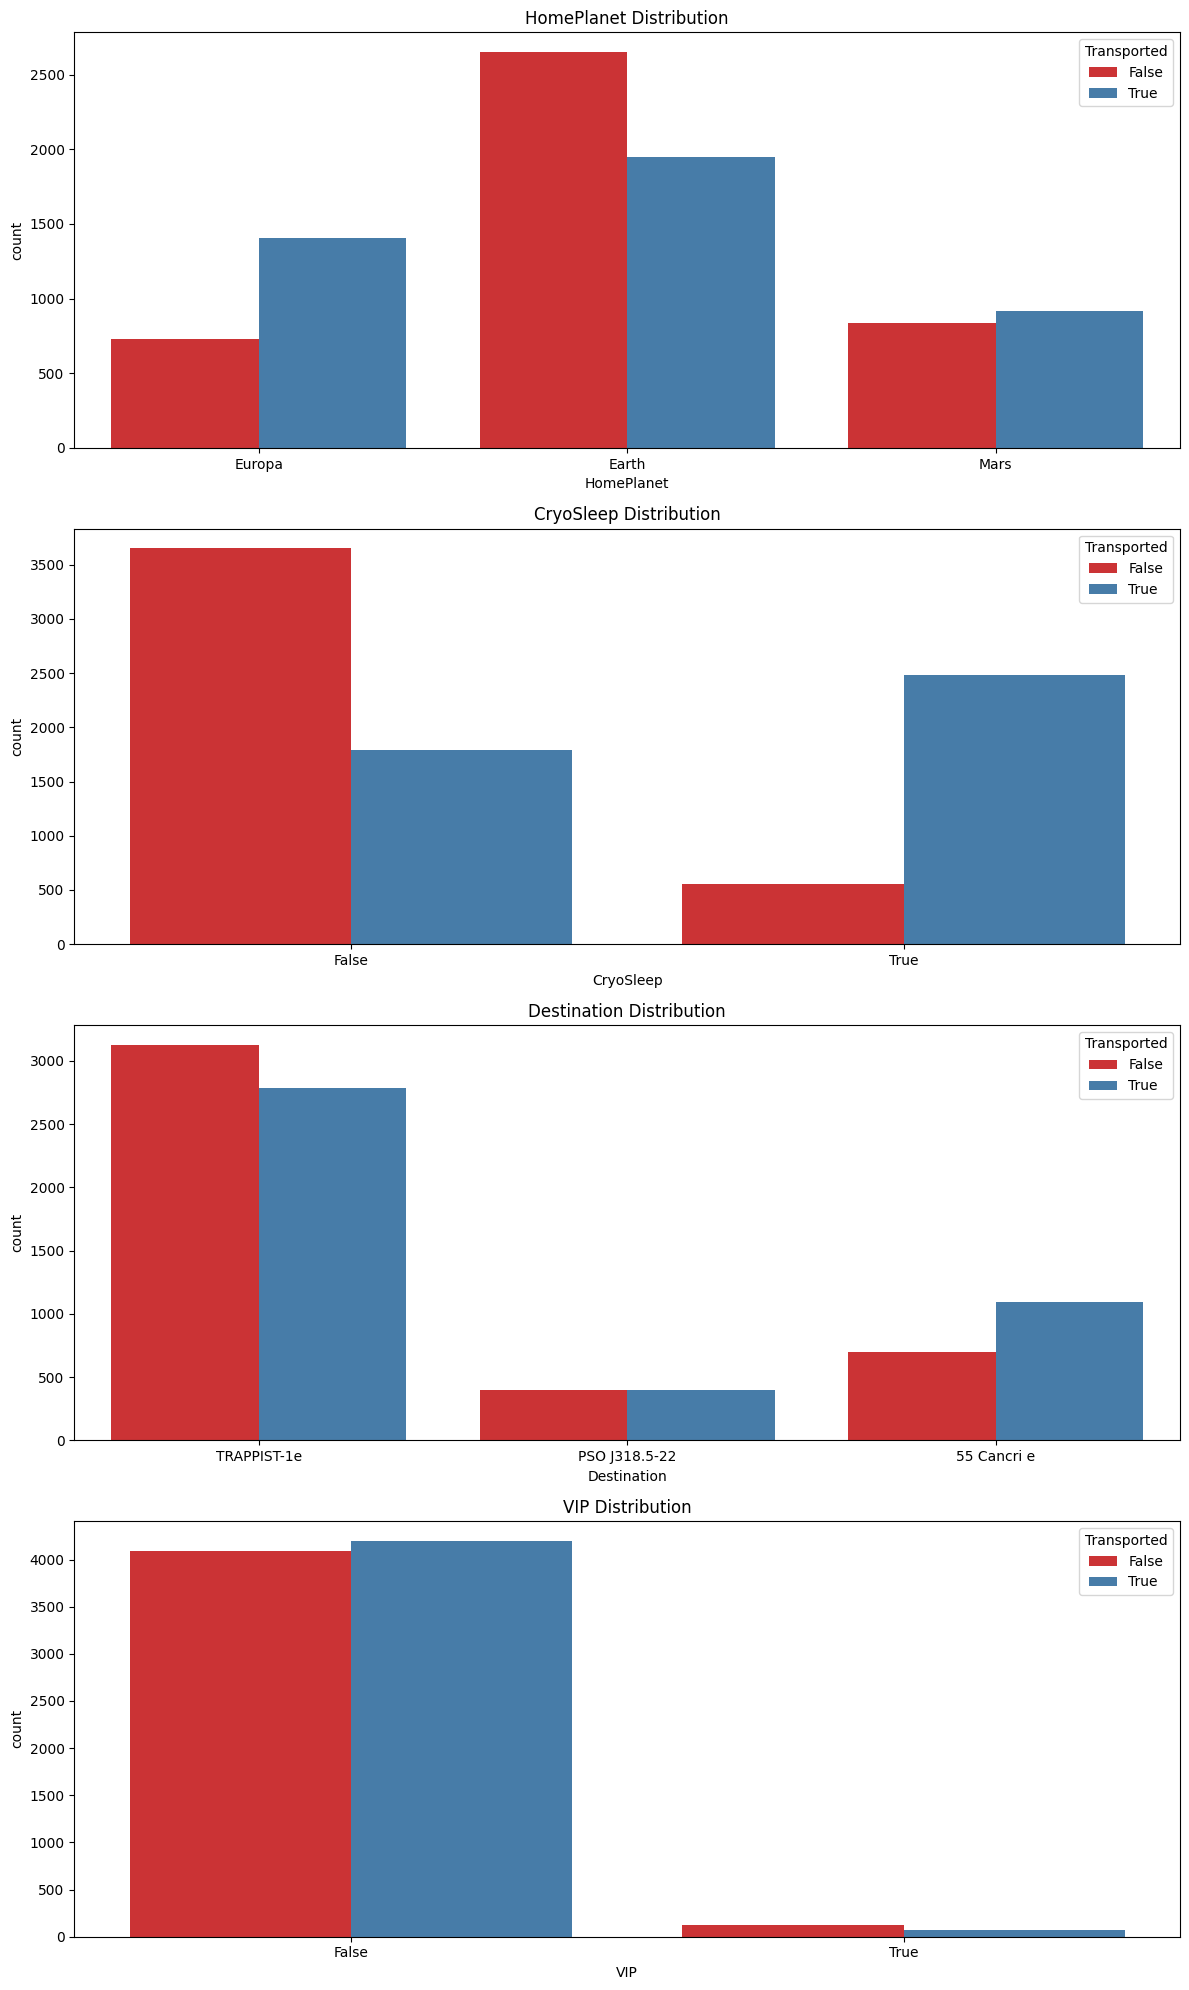

In [27]:
#visualising categorical features 

cat_cols = ["HomePlanet","CryoSleep","Destination","VIP"]

plt.figure(figsize=(12,20))
for idx,column in enumerate(cat_cols):
    plt.subplot(4,1,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_raw, palette="Set1")
    plt.title(f"{column} Distribution")
    plt.tight_layout()


#most passengers are from earth, this category is less likely to be transported
#passengers are more likely to be transported if they choose to be in cryosleep 
#most of the passengers are transported to Trappist-1e
#many more non-VIPs than VIPs, this can lead to overfitting so will need to drop this column as will not be able to acccurately use the VIP=True 